<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/imdb_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds



In [3]:
(train, test), metadata = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAUXOPI/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAUXOPI/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteAUXOPI/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
for x, y in train.take(1):
    print(x.numpy())
    print(y.numpy())

#x[0], y[0]

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0


In [5]:
metadata.features['label'].names


['neg', 'pos']

In [6]:
metadata

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmptb551lkftfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [7]:
for x, y in test.take(1):
    print(x.numpy())
    print(y.numpy())

b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."
1


In [8]:
train_text = []
train_labels = []

for x, y in train:
    train_text.append(x.numpy().decode('utf8'))
    train_labels.append(y.numpy())

test_text = []
test_labels = []

for x, y in test:
    test_text.append(x.numpy().decode('utf8'))
    test_labels.append(y.numpy())


In [9]:
len(train_text), len(train_labels)



(25000, 25000)

In [10]:
train_text[1]

'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'

In [11]:
len_setntenses = [len(x.split()) for x in train_text]
len(len_setntenses)


25000

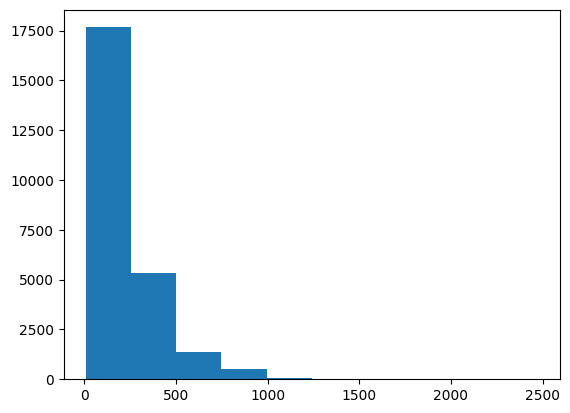

In [12]:
plt.hist(len_setntenses)
plt.show()



In [13]:
np.quantile(len_setntenses, 0.95)

598.0

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
vector = cv.fit(train_text)


In [15]:
len(cv.get_feature_names_out())


74849

In [16]:
VOCAB_SIZE = 40000
MAX_LENGHT = 500

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=VOCAB_SIZE,
        filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n',
        lower=True,
        split=' ')


In [18]:
# create val_data set
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_text, train_labels, test_size=0.2)

In [19]:
tokenizer.fit_on_texts(train_x)

train_x = tokenizer.texts_to_sequences(train_x)
train_x = pad_sequences(train_x, maxlen=MAX_LENGHT,padding='post',truncating='post')

val_x = tokenizer.texts_to_sequences(val_x)
val_x = pad_sequences(val_x, maxlen=MAX_LENGHT,padding='post',truncating='post')

In [20]:
# create dataset
train_data= tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_data= train_data.shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE)


val_data= tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_data= val_data.batch(64).prefetch(tf.data.AUTOTUNE)

In [128]:
def create_model():
  inputs = tf.keras.layers.Input(shape=(MAX_LENGHT,))
  x = tf.keras.layers.Embedding(VOCAB_SIZE, MAX_LENGHT)(inputs)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256))(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  x = tf.keras.layers.Dense(64, 'relu')(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  x = tf.keras.layers.Dense(32, 'relu')(x)
  outputs = tf.keras.layers.Dense(1, 'sigmoid')(x)

  model = tf.keras.models.Model(inputs, outputs)

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [131]:
model = create_model()
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_14 (Embedding)    (None, 500, 500)          20000000  
                                                                 
 bidirectional_21 (Bidirect  (None, 512)               1550336   
 ional)                                                          
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                32832     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                           

In [132]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[ES])


Epoch 1/10
313/313 [==============================] - 91s 265ms/step - loss: 0.6116 - accuracy: 0.6626 - val_loss: 0.5222 - val_accuracy: 0.7698
Epoch 2/10
313/313 [==============================] - 42s 134ms/step - loss: 0.3831 - accuracy: 0.8465 - val_loss: 0.4476 - val_accuracy: 0.8094
Epoch 3/10
313/313 [==============================] - 43s 139ms/step - loss: 0.4385 - accuracy: 0.8109 - val_loss: 0.4733 - val_accuracy: 0.7992
Epoch 4/10
313/313 [==============================] - 42s 133ms/step - loss: 0.2161 - accuracy: 0.9233 - val_loss: 0.4226 - val_accuracy: 0.8382
Epoch 5/10
313/313 [==============================] - 42s 133ms/step - loss: 0.2129 - accuracy: 0.9172 - val_loss: 0.4933 - val_accuracy: 0.7852
Epoch 6/10
313/313 [==============================] - 42s 133ms/step - loss: 0.1453 - accuracy: 0.9485 - val_loss: 0.5143 - val_accuracy: 0.8432
Epoch 7/10
313/313 [==============================] - 42s 133ms/step - loss: 0.0788 - accuracy: 0.9744 - val_loss: 0.6763 - val_ac

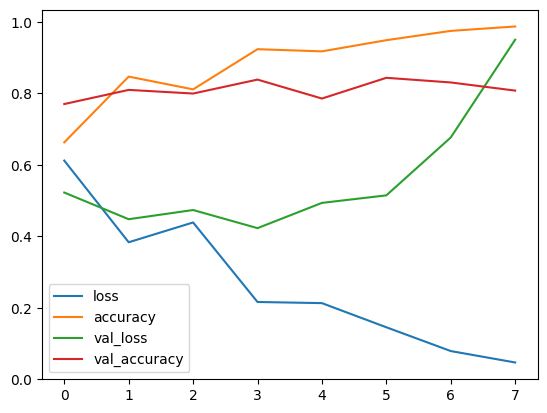

In [133]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.show()



In [92]:
model.evaluate(val_data)



79/79 [==============================] - 4s 47ms/step - loss: 0.5515 - accuracy: 0.8546


[0.5514780879020691, 0.8546000123023987]

In [21]:
test

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [22]:
test_x = tokenizer.texts_to_sequences(test_text)
test_x = pad_sequences(test_x, maxlen=MAX_LENGHT,padding='post',truncating='post')



In [23]:
test_data = tf.data.Dataset.from_tensor_slices((test_x, test_labels))
test_data = test_data.batch(64).prefetch(tf.data.AUTOTUNE)

In [98]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 500), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [134]:
model.evaluate(test_data)


391/391 [==============================] - 18s 46ms/step - loss: 0.5043 - accuracy: 0.8122


[0.5043022036552429, 0.8122000098228455]

In [24]:
# create simple model
def create_model2():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64, input_length=MAX_LENGHT),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [25]:
simple_model = create_model2()
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history2 = simple_model.fit(train_data, epochs=30, validation_data=val_data, callbacks = [ES])


Epoch 1/30
313/313 [==============================] - 87s 257ms/step - loss: 0.5509 - accuracy: 0.7565 - val_loss: 0.3507 - val_accuracy: 0.8548
Epoch 2/30
313/313 [==============================] - 47s 151ms/step - loss: 0.2796 - accuracy: 0.8869 - val_loss: 0.2880 - val_accuracy: 0.8770
Epoch 3/30
313/313 [==============================] - 34s 110ms/step - loss: 0.1813 - accuracy: 0.9344 - val_loss: 0.2742 - val_accuracy: 0.8848
Epoch 4/30
313/313 [==============================] - 20s 65ms/step - loss: 0.1068 - accuracy: 0.9668 - val_loss: 0.2783 - val_accuracy: 0.8834
Epoch 5/30
313/313 [==============================] - 19s 60ms/step - loss: 0.0567 - accuracy: 0.9869 - val_loss: 0.2937 - val_accuracy: 0.8836
Epoch 6/30
313/313 [==============================] - 15s 48ms/step - loss: 0.0276 - accuracy: 0.9959 - val_loss: 0.3160 - val_accuracy: 0.8826
Epoch 7/30
313/313 [==============================] - 13s 42ms/step - loss: 0.0129 - accuracy: 0.9992 - val_loss: 0.3356 - val_accura

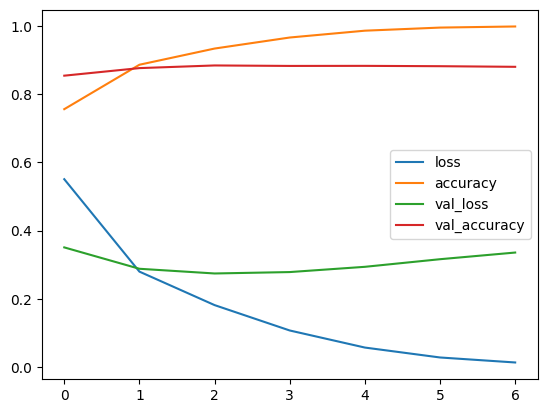

In [28]:
import pandas as pd
pd.DataFrame(history2.history).plot()
plt.show()



In [29]:
simple_model.evaluate(test_data)


391/391 [==============================] - 1s 3ms/step - loss: 0.2925 - accuracy: 0.8752


[0.29248836636543274, 0.8751999735832214]

In [30]:
simple_model.save('simple_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# create simple model
def create_model3():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64, input_length=MAX_LENGHT),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [33]:
simple_model3 = create_model3()
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history3 = simple_model3.fit(train_data, epochs=30, validation_data=val_data, callbacks = [ES])

Epoch 1/30
313/313 [==============================] - 53s 165ms/step - loss: 0.6179 - accuracy: 0.7049 - val_loss: 0.4611 - val_accuracy: 0.8362
Epoch 2/30
313/313 [==============================] - 37s 117ms/step - loss: 0.3424 - accuracy: 0.8762 - val_loss: 0.2949 - val_accuracy: 0.8918
Epoch 3/30
313/313 [==============================] - 30s 97ms/step - loss: 0.2302 - accuracy: 0.9182 - val_loss: 0.2602 - val_accuracy: 0.8974
Epoch 4/30
313/313 [==============================] - 17s 53ms/step - loss: 0.1737 - accuracy: 0.9416 - val_loss: 0.2518 - val_accuracy: 0.9026
Epoch 5/30
313/313 [==============================] - 15s 48ms/step - loss: 0.1327 - accuracy: 0.9588 - val_loss: 0.2544 - val_accuracy: 0.9038
Epoch 6/30
313/313 [==============================] - 11s 34ms/step - loss: 0.1037 - accuracy: 0.9698 - val_loss: 0.2643 - val_accuracy: 0.8982
Epoch 7/30
313/313 [==============================] - 9s 30ms/step - loss: 0.0812 - accuracy: 0.9773 - val_loss: 0.2811 - val_accuracy

In [34]:
simple_model3.evaluate(test_data)

391/391 [==============================] - 1s 3ms/step - loss: 0.2899 - accuracy: 0.8851


[0.28985869884490967, 0.8850799798965454]

In [38]:
simple_model3.evaluate(val_data)

79/79 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.9026


[0.25175580382347107, 0.9025999903678894]

In [35]:
simple_model3.save('simple_model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# create simple model
def create_model4():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 50, input_length=MAX_LENGHT),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [40]:
simple_model4 = create_model4()
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history4 = simple_model4.fit(train_data, epochs=30, validation_data=val_data, callbacks = [ES])

Epoch 1/30
313/313 [==============================] - 72s 226ms/step - loss: 0.6516 - accuracy: 0.6513 - val_loss: 0.5333 - val_accuracy: 0.8132
Epoch 2/30
313/313 [==============================] - 45s 145ms/step - loss: 0.4052 - accuracy: 0.8509 - val_loss: 0.3218 - val_accuracy: 0.8806
Epoch 3/30
313/313 [==============================] - 30s 95ms/step - loss: 0.2674 - accuracy: 0.9032 - val_loss: 0.2822 - val_accuracy: 0.8908
Epoch 4/30
313/313 [==============================] - 24s 76ms/step - loss: 0.2059 - accuracy: 0.9262 - val_loss: 0.2584 - val_accuracy: 0.8996
Epoch 5/30
313/313 [==============================] - 16s 50ms/step - loss: 0.1629 - accuracy: 0.9465 - val_loss: 0.2531 - val_accuracy: 0.8996
Epoch 6/30
313/313 [==============================] - 14s 45ms/step - loss: 0.1324 - accuracy: 0.9570 - val_loss: 0.2599 - val_accuracy: 0.8990
Epoch 7/30
313/313 [==============================] - 13s 41ms/step - loss: 0.1073 - accuracy: 0.9676 - val_loss: 0.2692 - val_accurac

In [41]:
simple_model4.evaluate(val_data)

79/79 [==============================] - 43s 549ms/step - loss: 0.2531 - accuracy: 0.8996


[0.2531013488769531, 0.8996000289916992]

In [42]:
simple_model4.evaluate(test_data)

391/391 [==============================] - 2s 5ms/step - loss: 0.2869 - accuracy: 0.8874


[0.28690817952156067, 0.8873999714851379]

In [43]:
simple_model4.save('simple_model4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
